In [4]:
# Kiley Huffman
# QBIO 482
# Assignment 4
# Due April 17, 2025

# Question 1.

Simulate a discrete random walk lasting 10 seconds with a timestep Δt=0.1 second on a 2D lattice with lattice size a=0.1 nm. The random walk should have an equal chance to move to any of 4 adjacent lattice sites (i.e. up, down, left, or right). Use NumPy and vectorize your code where possible. Recall that we discussed in class that passing the desired shape to np.random() can allow for generating random numbers quickly and that np.cumsum() can be used to quickly sum displacements. Visualize your random walk with a line plot of distance
from the origin vs. time with a linear axis. 

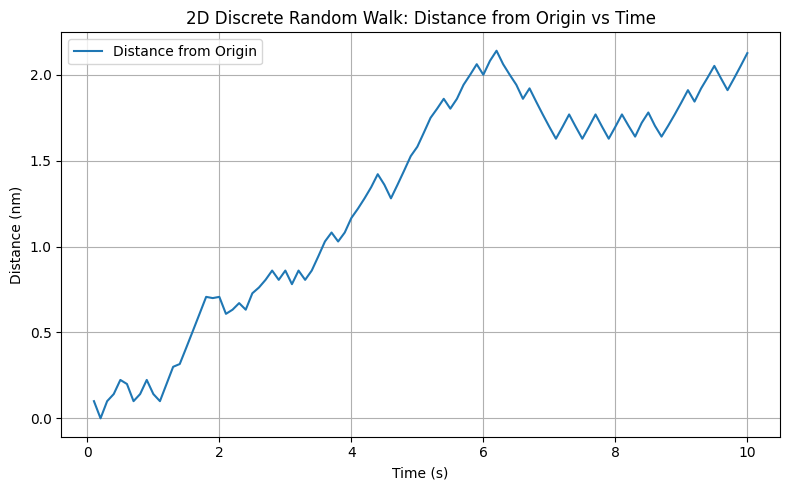

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
dt = 0.1  # timestep in seconds
total_time = 10  # seconds total
num_steps = int(total_time / dt) # number of steps total 
a = 0.1  # lattice size in nm

# 2D lattice
# Step directions: [dx, dy] for up, down, left, right
step_vectors = np.array([
    [0, 1],   # up
    [0, -1],  # down
    [-1, 0],  # left
    [1, 0]    # right
])

# Randomly select directions for each step
directions = np.random.choice(4, size=num_steps)

# Convert directions to step vectors
steps = step_vectors[directions] * a  # shape: (num_steps, 2)

# Compute positions over time
positions = np.cumsum(steps, axis=0)  # shape: (num_steps, 2)

# Compute distance from origin at each step
distances = np.linalg.norm(positions, axis=1)

# Time array
time_array = np.arange(dt, total_time + dt, dt)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(time_array, distances, label="Distance from Origin")
plt.xlabel("Time (s)")
plt.ylabel("Distance (nm)")
plt.title("2D Discrete Random Walk: Distance from Origin vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Question 2. 

Simulate a random walk in 2D with a variable step size drawn from a normal distribution (np.random.randn()) with a standard deviation of 0.1nm in both x and y directions. Use the same timestep and a duration of 1000 seconds. Plot the distance from the origin as a function
of time on a log-log plot, averaged over 100 walks. Plot the same relationship for a 1000 second walk on the 2D lattice. Describe (in one or two sentences) how the relationships behave similarly or differently.

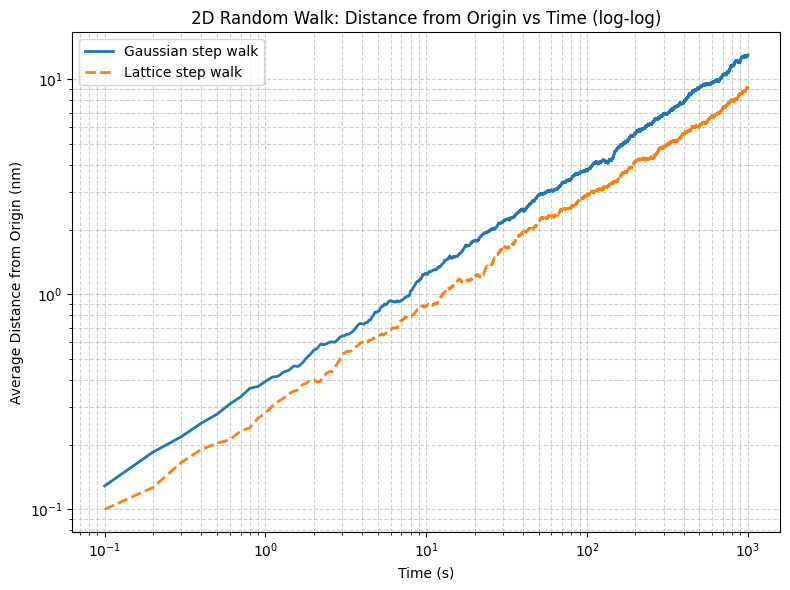

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
dt = 0.1  # timestep seconds
total_time = 1000  # total seconds
num_steps = int(total_time / dt) # number of timesteps total
a = 0.1  # lattice size in nm
num_walks = 100 # walks total 

time = np.arange(1, num_steps + 1) * dt

# Gaussian random walk
steps_gauss = np.random.randn(num_walks, num_steps, 2) * a # variable step size drawn from a normal distribution
positions_gauss = np.cumsum(steps_gauss, axis=1)
distances_gauss = np.linalg.norm(positions_gauss, axis=2)
mean_distance_gauss = np.mean(distances_gauss, axis=0)

# Lattice random walk 
directions = np.random.choice(4, size=(num_walks, num_steps))
step_map = np.array([[0, 1], [0, -1], [-1, 0], [1, 0]])  # up, down, left, right
steps_lattice = step_map[directions] * a
positions_lattice = np.cumsum(steps_lattice, axis=1)
distances_lattice = np.linalg.norm(positions_lattice, axis=2)
mean_distance_lattice = np.mean(distances_lattice, axis=0)

# Plot
plt.figure(figsize=(8, 6))
plt.loglog(time, mean_distance_gauss, label='Gaussian step walk', lw=2)
plt.loglog(time, mean_distance_lattice, label='Lattice step walk', lw=2, linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Average Distance from Origin (nm)")
plt.title("2D Random Walk: Distance from Origin vs Time (log-log)")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Describe (in one or two sentences) how the relationships behave similarly or differently:

Both the Gaussian and lattice random walks exhibit a square-root relationship between distance and time, as expected for normal diffusion. However, the Gaussian walk tends to produce slightly smoother and larger average displacements due to the continuous range of possible step directions and magnitudes, while the lattice walk is more constrained to four discrete directions.

# Question 3. 

Simulate many random walks on the 2D lattice with durations of 10, 20, 40, 100, 200, 500,and 1000 seconds. Calculate the probability for each of these walks to return to the origin as a function of length and visualize this relationship with a log-log plot.

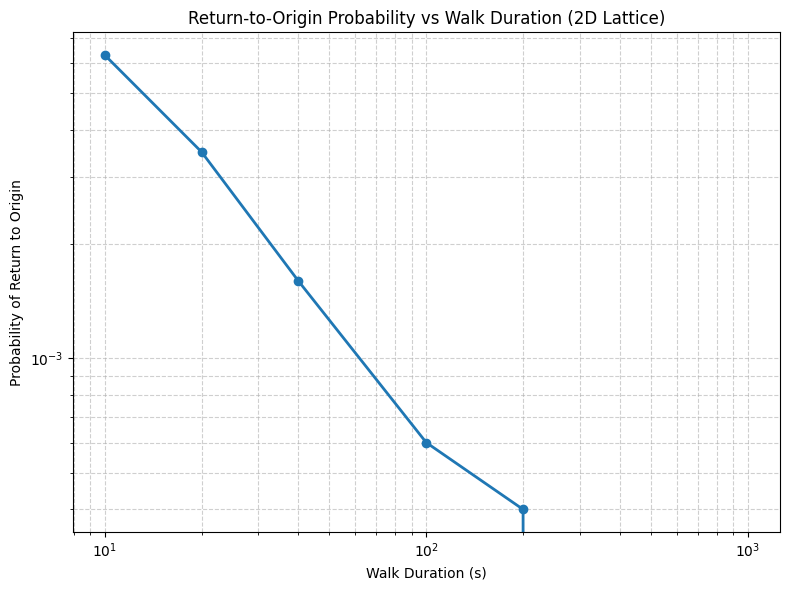

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
durations = np.array([10, 20, 40, 100, 200, 500, 1000])  # array of durations
dt = 0.1  # timestep
steps_per_duration = (durations / dt).astype(int)
num_walks = 10000
a = 0.1  # lattice spacing (nm)

# Step directions: up, down, left, right
directions = np.array([[0, 1], [0, -1], [-1, 0], [1, 0]])

return_probs = []

for num_steps in steps_per_duration:
    # Random directions for all walks (num_walks x num_steps)
    random_dirs = np.random.choice(4, size=(num_walks, num_steps))
    steps = directions[random_dirs] * a  # shape: (num_walks, num_steps, 2)
    positions = np.cumsum(steps, axis=1)
    final_positions = positions[:, -1, :]  # get final (x, y) positions
    returned = np.all(np.isclose(final_positions, 0), axis=1)  # check if at (0,0)
    return_prob = np.mean(returned)
    return_probs.append(return_prob)

# Plot results
plt.figure(figsize=(8, 6))
plt.loglog(durations, return_probs, marker='o', lw=2)
plt.xlabel("Walk Duration (s)")
plt.ylabel("Probability of Return to Origin")
plt.title("Return-to-Origin Probability vs Walk Duration (2D Lattice)")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Question 4. 

Repeat part (3) for walks on a 1D and 3D lattice with the same lattice size. Explain how 1D, 2D, and 3D walks differ on the log-log plot (Note: you may need ~105 walks to get accurate statistics for 3D walks!). Explain how confining molecules to a 2D membrane could be used as a
strategy for cells to speed up molecular communication in up to four sentences.

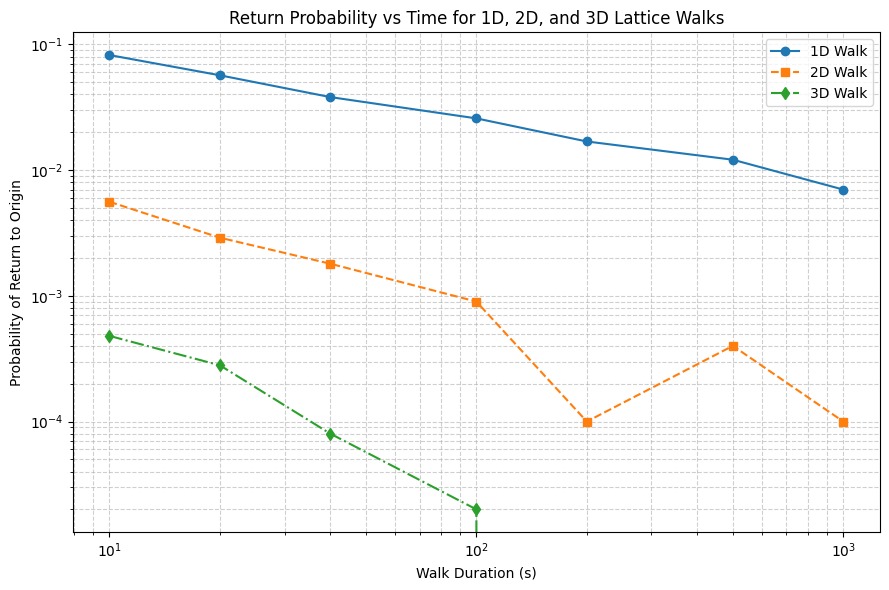

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
durations = np.array([10, 20, 40, 100, 200, 500, 1000])  # seconds
dt = 0.1
steps_per_duration = (durations / dt).astype(int)
a = 1  # lattice unit (unitless steps)
num_walks_1d = 10000
num_walks_2d = 10000
num_walks_3d = 50000  # reduced from 100k for speed

def return_prob(dim, num_walks, steps_array):
    probs = []
    for num_steps in steps_array:
        if dim == 1:
            step_choices = np.random.choice([-1, 1], size=(num_walks, num_steps))
            final_pos = np.sum(step_choices, axis=1)
            returned = (final_pos == 0)
        elif dim == 2:
            steps = np.random.choice(4, size=(num_walks, num_steps))
            dx = np.sum((steps == 0).astype(int) - (steps == 1).astype(int), axis=1)
            dy = np.sum((steps == 2).astype(int) - (steps == 3).astype(int), axis=1)
            returned = (dx == 0) & (dy == 0)
        elif dim == 3:
            steps = np.random.choice(6, size=(num_walks, num_steps))
            dx = np.sum((steps == 0).astype(int) - (steps == 1).astype(int), axis=1)
            dy = np.sum((steps == 2).astype(int) - (steps == 3).astype(int), axis=1)
            dz = np.sum((steps == 4).astype(int) - (steps == 5).astype(int), axis=1)
            returned = (dx == 0) & (dy == 0) & (dz == 0)
        probs.append(np.mean(returned))
    return probs

# Run simulations
returns_1d = return_prob(1, num_walks_1d, steps_per_duration)
returns_2d = return_prob(2, num_walks_2d, steps_per_duration)
returns_3d = return_prob(3, num_walks_3d, steps_per_duration)

# Plotting
plt.figure(figsize=(9, 6))
plt.loglog(durations, returns_1d, 'o-', label='1D Walk')
plt.loglog(durations, returns_2d, 's--', label='2D Walk')
plt.loglog(durations, returns_3d, 'd-.', label='3D Walk')
plt.xlabel("Walk Duration (s)")
plt.ylabel("Probability of Return to Origin")
plt.title("Return Probability vs Time for 1D, 2D, and 3D Lattice Walks")
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Explain how 1D, 2D, and 3D walks differ on the log-log plot (Note: you may need ~105 walks to get accurate statistics for 3D walks!):

In 1D, the return probability remains high, decreasing slowly.

In 2D, the return probability is lower than 1D, and decreases more rapidly than 1D. It also contains points of discontinuity. 

In 3D, the return probability drops off quickly, as walkers are increasingly unlikely to return, compared to both the 1D and 2D walks. 

Explain how confining molecules to a 2D membrane could be used as a strategy for cells to speed up molecular communication in up to four sentences:

In 1D and 2D, random walkers have a high probability of returning to the origin, while in 3D the return probability decreases quickly with time. This means that confinement to 2D, such as on a cell membrane, increases the likelihood of molecules encountering their targets. Cells can exploit this by anchoring receptors or enzymes in 2D membranes to enhance reaction rates and signaling efficiency. By reducing the dimensionality of diffusion, cells speed up molecular communication and improve signal fidelity.

# Question 5. 

Conventional microscopy to observe individual fluorescent proteins won’t work. In this part of the problem, we are going to work out why. During a traditional experiment, the microscope shutter is open during some time interval of roughly 30 milliseconds. By assuming a diffusion
constant of 10 µm2/s, work out how far the fluorescent protein will move during the time that the shutter is open and compare that distance to the size of the cell itself and comment on how this limits our ability to measure the diffusion constant. Perform the estimate a second time, this time using an open shutter interval of 0.3 ms, shown in Figure 1(A).

In [17]:
import numpy as np

# Given info
diff_constant= 10 # units of um^2/s
t1 = 0.03 # time in s
t2 = 0.0003 # time in s
dim = 2

# Perform calculation
# r_rms = np.sqrt(2dDt) d = dimension = 2 (on a membrane), D = diffusion constant, t = time
r_rms_t1 = np.sqrt(2*dim*diff_constant*t1) 
r_rms_t2 =  np.sqrt(2*dim*diff_constant*t2) 

print(f"Shutter time t₁ = {t1*1000:.1f} ms → RMS displacement = {r_rms_t1:.3f} µm")
print(f"Shutter time t₂ = {t2*1000:.1f} ms → RMS displacement = {r_rms_t2:.3f} µm")

Shutter time t₁ = 30.0 ms → RMS displacement = 1.095 µm
Shutter time t₂ = 0.3 ms → RMS displacement = 0.110 µm


30 ms exposure: The protein moves 1.1 µm. This is a significant fraction of the entire cell, which is usually ~10–20 µm wide. This motion blurs the signal, making it hard to resolve the position precisely. It also makes accurate diffusion constant measurement unreliable.

0.3 ms exposure: The protein only moves 110nm. This is on the same order as the optical resolution limit (200-300nm). This much shorter interval reduces motion blur and allows us to more accurately track the protein and infer the diffusion constant.

# Question 6. 

Using the trajectories shown in Figure 2 and the relationship we derived, t ∝ L2/D, to estimate the diffusion constant for GFP . Note that the trajectories are 15 frames and each frame is 4ms. You should not need to measure the length of each step. Explain your reasoning carefully in up to three sentences.

In [36]:
# Equation for estimating the diffusion constant for GFP
# D = (L**2/t)
frames = 15
frame_time = 4 # in ms
total_time = (15*frame_time/1000) # time in seconds
print("t=", total_time)

import matplotlib.pyplot as plt

# Time duration
t = 0.06  # seconds

# Displacement estimates (from visual inspection)
L1 = 0.5   # micrometers (left trajectory)
L2 = 1.3   # micrometers (right trajectory)

# Compute diffusion constants using D ≈ L^2 / t
D1 = L1**2 / t
D2 = L2**2 / t

# Print results nicely
print(f"Left Trajectory:  L = {L1} µm,  D ≈ {D1:.2f} µm²/s")
print(f"Right Trajectory: L = {L2} µm,  D ≈ {D2:.2f} µm²/s")

t= 0.06
Left Trajectory:  L = 0.5 µm,  D ≈ 4.17 µm²/s
Right Trajectory: L = 1.3 µm,  D ≈ 28.17 µm²/s


The diffusion constant for the left trajectory is estimated to be D = 4.17 um^2/s.

The diffusion constant for the right trajectory is estimated to be D = 28.17 um^2/s

I estimated the diffusion constant using the relationship we derived, rearranged as D = L^2/t. From the figure, each trajectory consists of 15 steps taken every 4 ms, giving a total time of t = 0.06s. By visually estimating the total displacement, L ,of each trajectory and plugging it into the equation, I approximated D for each case, which falls within the expected range for GFP diffusion in cells.

# Question 7. 

In class we discussed how single-particle tracking has been used to estimate diffusion coefficients of CRISPR-cas9. Since experiments are not perfect, it is important to consider their limitations. What could bias the collection or analysis of single-particle tracking data inside a living cell? Come up with one or two possibilities & explain why this would bias the diffusion coefficient estimation in one or two sentences.

One potential source of bias in single particle tracking is limited spatial resolution, which can cause small displacements to be indistinguishable from noise leading to underestimation of the diffusion coefficient. Another source is photobleaching or blinking of the fluorescent label, which may cause the trajectory to be cut short or interrupted, biasing the analysis toward slower-moving particles that remain visible longer.